# Section A

a. Upload data and transform from text/categorical to numeric column

In [2]:
from google.colab import files
uploaded = files.upload()

Saving psxtrk.csv to psxtrk.csv


In [0]:
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [0]:
df = pd.read_csv(io.StringIO(uploaded['psxtrk.csv'].decode('utf-8')))

In [5]:
(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,39,blue-collar,married,secondary,no,860,yes,no,cellular,8,312,1,-1,0,unknown,no
1,46,admin.,married,secondary,no,-522,yes,no,cellular,27,243,3,239,13,other,yes
2,53,blue-collar,married,primary,no,25,yes,no,unknown,6,266,3,-1,0,unknown,no
3,48,services,married,secondary,no,1355,no,no,cellular,4,134,2,-1,0,unknown,no
4,34,blue-collar,married,secondary,no,0,yes,no,cellular,31,79,5,110,7,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,management,single,tertiary,no,36252,yes,no,cellular,30,501,1,-1,0,unknown,yes
4996,59,blue-collar,married,secondary,no,0,yes,no,unknown,20,217,4,-1,0,unknown,no
4997,35,technician,married,secondary,no,0,yes,no,cellular,9,524,1,96,5,success,yes
4998,26,self-employed,single,tertiary,no,993,no,no,cellular,8,152,1,-1,0,unknown,no


In [6]:
df['y'].value_counts()

no     4414
yes     586
Name: y, dtype: int64

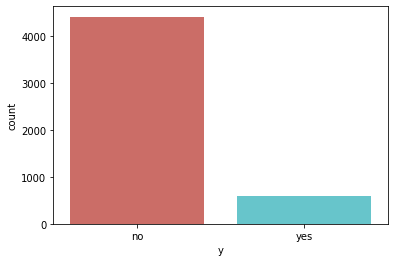

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x = 'y', data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [8]:
df_pre1 = pd.DataFrame(data=df)
df_pre1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
df_pre2 = pd.concat([
        df_pre1.select_dtypes([], ['object']),
        df_pre1.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')
        ], axis=1).reindex(df.columns, axis=1)
df_pre2.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [10]:
df_pre2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
age          5000 non-null int64
job          5000 non-null category
marital      5000 non-null category
education    5000 non-null category
default      5000 non-null category
balance      5000 non-null int64
housing      5000 non-null category
loan         5000 non-null category
contact      5000 non-null category
day          5000 non-null int64
duration     5000 non-null int64
campaign     5000 non-null int64
pdays        5000 non-null int64
previous     5000 non-null int64
poutcome     5000 non-null category
y            5000 non-null category
dtypes: category(9), int64(7)
memory usage: 318.9 KB


In [11]:
df_pre2

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,39,blue-collar,married,secondary,no,860,yes,no,cellular,8,312,1,-1,0,unknown,no
1,46,admin.,married,secondary,no,-522,yes,no,cellular,27,243,3,239,13,other,yes
2,53,blue-collar,married,primary,no,25,yes,no,unknown,6,266,3,-1,0,unknown,no
3,48,services,married,secondary,no,1355,no,no,cellular,4,134,2,-1,0,unknown,no
4,34,blue-collar,married,secondary,no,0,yes,no,cellular,31,79,5,110,7,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,management,single,tertiary,no,36252,yes,no,cellular,30,501,1,-1,0,unknown,yes
4996,59,blue-collar,married,secondary,no,0,yes,no,unknown,20,217,4,-1,0,unknown,no
4997,35,technician,married,secondary,no,0,yes,no,cellular,9,524,1,96,5,success,yes
4998,26,self-employed,single,tertiary,no,993,no,no,cellular,8,152,1,-1,0,unknown,no


In [0]:
df_pre2['y'] = df_pre2['y'].map({'yes': 1, 'no': 0})


In [13]:
df_pre2

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,39,blue-collar,married,secondary,no,860,yes,no,cellular,8,312,1,-1,0,unknown,0
1,46,admin.,married,secondary,no,-522,yes,no,cellular,27,243,3,239,13,other,1
2,53,blue-collar,married,primary,no,25,yes,no,unknown,6,266,3,-1,0,unknown,0
3,48,services,married,secondary,no,1355,no,no,cellular,4,134,2,-1,0,unknown,0
4,34,blue-collar,married,secondary,no,0,yes,no,cellular,31,79,5,110,7,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,management,single,tertiary,no,36252,yes,no,cellular,30,501,1,-1,0,unknown,1
4996,59,blue-collar,married,secondary,no,0,yes,no,unknown,20,217,4,-1,0,unknown,0
4997,35,technician,married,secondary,no,0,yes,no,cellular,9,524,1,96,5,success,1
4998,26,self-employed,single,tertiary,no,993,no,no,cellular,8,152,1,-1,0,unknown,0


In [0]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [15]:
df_pre3 = df_pre2.copy()
df_pre3

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,39,blue-collar,married,secondary,no,860,yes,no,cellular,8,312,1,-1,0,unknown,0
1,46,admin.,married,secondary,no,-522,yes,no,cellular,27,243,3,239,13,other,1
2,53,blue-collar,married,primary,no,25,yes,no,unknown,6,266,3,-1,0,unknown,0
3,48,services,married,secondary,no,1355,no,no,cellular,4,134,2,-1,0,unknown,0
4,34,blue-collar,married,secondary,no,0,yes,no,cellular,31,79,5,110,7,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,management,single,tertiary,no,36252,yes,no,cellular,30,501,1,-1,0,unknown,1
4996,59,blue-collar,married,secondary,no,0,yes,no,unknown,20,217,4,-1,0,unknown,0
4997,35,technician,married,secondary,no,0,yes,no,cellular,9,524,1,96,5,success,1
4998,26,self-employed,single,tertiary,no,993,no,no,cellular,8,152,1,-1,0,unknown,0


In [16]:
df.info()
df_pre4 = df.copy()
df_pre4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
age          5000 non-null int64
job          5000 non-null object
marital      5000 non-null object
education    5000 non-null object
default      5000 non-null object
balance      5000 non-null int64
housing      5000 non-null object
loan         5000 non-null object
contact      5000 non-null object
day          5000 non-null int64
duration     5000 non-null int64
campaign     5000 non-null int64
pdays        5000 non-null int64
previous     5000 non-null int64
poutcome     5000 non-null object
y            5000 non-null object
dtypes: int64(7), object(9)
memory usage: 625.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
age          5000 non-null int64
job          5000 non-null object
marital      5000 non-null object
education    5000 non-null object
default      5000 non-null object
balance      5000 non-null i

In [17]:
df_pre4['y'] = df_pre4['y'].map({'yes': 1, 'no': 0})
df_pre4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
age          5000 non-null int64
job          5000 non-null object
marital      5000 non-null object
education    5000 non-null object
default      5000 non-null object
balance      5000 non-null int64
housing      5000 non-null object
loan         5000 non-null object
contact      5000 non-null object
day          5000 non-null int64
duration     5000 non-null int64
campaign     5000 non-null int64
pdays        5000 non-null int64
previous     5000 non-null int64
poutcome     5000 non-null object
y            5000 non-null int64
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


In [18]:
means = df_pre4.groupby('job')['y'].mean()
means
df_pre4['job'] = df_pre4['job'].map(means)
df_pre4

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,39,0.070476,married,secondary,no,860,yes,no,cellular,8,312,1,-1,0,unknown,0
1,46,0.111314,married,secondary,no,-522,yes,no,cellular,27,243,3,239,13,other,1
2,53,0.070476,married,primary,no,25,yes,no,unknown,6,266,3,-1,0,unknown,0
3,48,0.074324,married,secondary,no,1355,no,no,cellular,4,134,2,-1,0,unknown,0
4,34,0.070476,married,secondary,no,0,yes,no,cellular,31,79,5,110,7,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,0.147779,single,tertiary,no,36252,yes,no,cellular,30,501,1,-1,0,unknown,1
4996,59,0.070476,married,secondary,no,0,yes,no,unknown,20,217,4,-1,0,unknown,0
4997,35,0.118406,married,secondary,no,0,yes,no,cellular,9,524,1,96,5,success,1
4998,26,0.085890,single,tertiary,no,993,no,no,cellular,8,152,1,-1,0,unknown,0


In [0]:
means_marital = df_pre4.groupby('marital')['y'].mean()
df_pre4['marital'] = df_pre4['marital'].map(means_marital)

means_education = df_pre4.groupby('education')['y'].mean()
df_pre4['education'] = df_pre4['education'].map(means_education)

means_default = df_pre4.groupby('default')['y'].mean()
df_pre4['default'] = df_pre4['default'].map(means_default)

means_housing = df_pre4.groupby('housing')['y'].mean()
df_pre4['housing'] = df_pre4['housing'].map(means_housing)

means_loan = df_pre4.groupby('loan')['y'].mean()
df_pre4['loan'] = df_pre4['loan'].map(means_loan)

means_contact = df_pre4.groupby('contact')['y'].mean()
df_pre4['contact'] = df_pre4['contact'].map(means_contact)

means_poutcome = df_pre4.groupby('poutcome')['y'].mean()
df_pre4['poutcome'] = df_pre4['poutcome'].map(means_poutcome)


In [20]:
df_pre4

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,39,0.070476,0.101257,0.103866,0.11844,860,0.079179,0.127619,0.151534,8,312,1,-1,0,0.092255,0
1,46,0.111314,0.101257,0.103866,0.11844,-522,0.079179,0.127619,0.151534,27,243,3,239,13,0.139535,1
2,53,0.070476,0.101257,0.089310,0.11844,25,0.079179,0.127619,0.040531,6,266,3,-1,0,0.092255,0
3,48,0.074324,0.101257,0.103866,0.11844,1355,0.162852,0.127619,0.151534,4,134,2,-1,0,0.092255,0
4,34,0.070476,0.101257,0.103866,0.11844,0,0.079179,0.127619,0.151534,31,79,5,110,7,0.120939,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,0.147779,0.150646,0.155556,0.11844,36252,0.079179,0.127619,0.151534,30,501,1,-1,0,0.092255,1
4996,59,0.070476,0.101257,0.103866,0.11844,0,0.079179,0.127619,0.040531,20,217,4,-1,0,0.092255,0
4997,35,0.118406,0.101257,0.103866,0.11844,0,0.079179,0.127619,0.151534,9,524,1,96,5,0.649718,1
4998,26,0.085890,0.150646,0.155556,0.11844,993,0.162852,0.127619,0.151534,8,152,1,-1,0,0.092255,0


In [0]:
df_pre5 = df_pre4.copy()

In [0]:
df_pre5['job'] = calc_smooth_mean(df_pre5, by='job', on='y', m=300)
df_pre5['marital'] = calc_smooth_mean(df_pre5, by='marital', on='y', m=300)
df_pre5['education'] = calc_smooth_mean(df_pre5, by='education', on='y', m=300)
df_pre5['default'] = calc_smooth_mean(df_pre5, by='default', on='y', m=300)
df_pre5['housing'] = calc_smooth_mean(df_pre5, by='housing', on='y', m=300)
df_pre5['loan'] = calc_smooth_mean(df_pre5, by='loan', on='y', m=300)
df_pre5['contact'] = calc_smooth_mean(df_pre5, by='contact', on='y', m=300)
df_pre5['poutcome'] = calc_smooth_mean(df_pre5, by='poutcome', on='y', m=300)

In [0]:
df_pre6 = df_pre5.copy()
df_post_w_duration = df_pre6.copy()

In [24]:
df_post_w_duration

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,39,0.080859,0.102697,0.105264,0.118368,860,0.082946,0.126917,0.148640,8,312,1,-1,0,0.093973,0
1,46,0.113396,0.102697,0.105264,0.118368,-522,0.082946,0.126917,0.148640,27,243,3,239,13,0.126524,1
2,53,0.080859,0.102697,0.097363,0.118368,25,0.082946,0.126917,0.053819,6,266,3,-1,0,0.093973,0
3,48,0.091613,0.102697,0.105264,0.118368,1355,0.157527,0.126917,0.148640,4,134,2,-1,0,0.093973,0
4,34,0.080859,0.102697,0.105264,0.118368,0,0.082946,0.126917,0.148640,31,79,5,110,7,0.119625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,0.141240,0.144723,0.149109,0.118368,36252,0.082946,0.126917,0.148640,30,501,1,-1,0,0.093973,1
4996,59,0.080859,0.102697,0.105264,0.118368,0,0.082946,0.126917,0.053819,20,217,4,-1,0,0.093973,0
4997,35,0.118092,0.102697,0.105264,0.118368,0,0.082946,0.126917,0.148640,9,524,1,96,5,0.314801,1
4998,26,0.106177,0.144723,0.149109,0.118368,993,0.157527,0.126917,0.148640,8,152,1,-1,0,0.093973,0


In [0]:
df_post = df_post_w_duration.drop(['duration'], axis = 1)

Text(0.5, 1.05, 'Correlation Matrix')

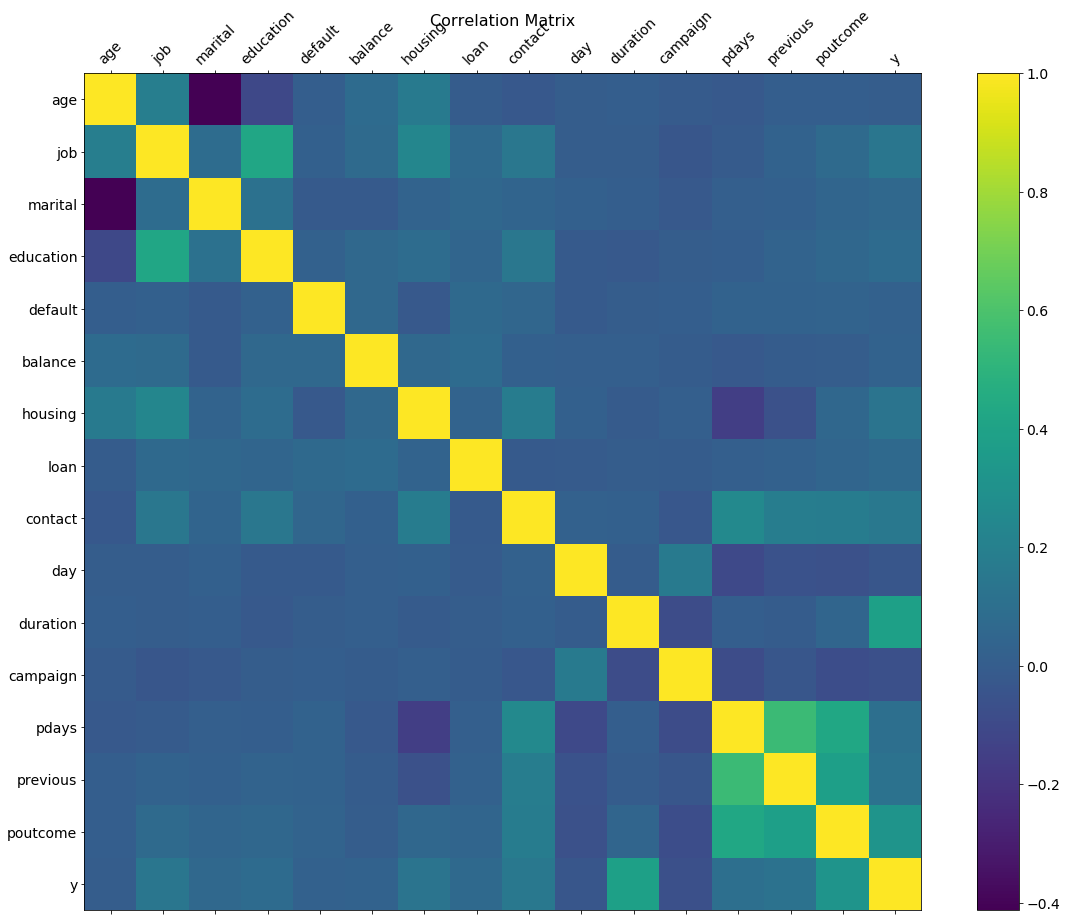

In [26]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(20, 15))
plt.matshow(df_post_w_duration.corr(), fignum=f.number)
plt.xticks(range(df_post_w_duration.shape[1]), df_post_w_duration.columns, fontsize=14, rotation=45)
plt.yticks(range(df_post_w_duration.shape[1]), df_post_w_duration.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [0]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_post_w_duration, 10))

Top Absolute Correlations
pdays     previous     0.550655
          poutcome     0.427876
job       education    0.421423
age       marital      0.412446
duration  y            0.388829
previous  poutcome     0.385763
poutcome  y            0.317107
contact   pdays        0.254289
job       housing      0.234074
age       job          0.190604
dtype: float64


In [0]:
df_post_w_duration.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.190604,-0.412446,-0.107063,0.010608,0.082058,0.164945,0.000693,-0.024431,0.005328,0.007517,-0.006606,-0.019526,0.011607,0.009531,0.006381
job,0.190604,1.000000,0.087047,0.421423,0.022342,0.073892,0.234074,0.069579,0.146050,0.002000,0.004404,-0.036705,-0.007038,0.033121,0.073710,0.143881
marital,-0.412446,0.087047,1.000000,0.113509,-0.010841,-0.013888,0.036827,0.057912,0.040611,0.018831,0.006905,-0.018357,0.013958,0.021661,0.049539,0.067132
education,-0.107063,0.421423,0.113509,1.000000,0.026962,0.064100,0.087881,0.050133,0.146201,-0.012270,-0.020108,0.005396,0.010377,0.038780,0.061899,0.078870
default,0.010608,0.022342,-0.010841,0.026962,1.000000,0.065767,-0.017524,0.069639,0.052524,-0.011673,0.003326,0.007779,0.032093,0.032620,0.035822,0.026578
balance,0.082058,0.073892,-0.013888,0.064100,0.065767,1.000000,0.062231,0.079388,0.020863,0.015683,0.012637,-0.000635,-0.019505,-0.000018,0.003946,0.031915
housing,0.164945,0.234074,0.036827,0.087881,-0.017524,0.062231,1.000000,0.036276,0.179725,0.019293,-0.004575,0.013619,-0.151499,-0.062382,0.059692,0.129523
loan,0.000693,0.069579,0.057912,0.050133,0.069639,0.079388,0.036276,1.000000,-0.012854,-0.006690,0.001529,-0.001355,0.014554,0.024157,0.047245,0.071722
contact,-0.024431,0.146050,0.040611,0.146201,0.052524,0.020863,0.179725,-0.012854,1.000000,0.025312,0.022607,-0.026698,0.254289,0.185143,0.182654,0.154010
day,0.005328,0.002000,0.018831,-0.012270,-0.011673,0.015683,0.019293,-0.006690,0.025312,1.000000,-0.000464,0.165532,-0.098019,-0.056567,-0.060500,-0.036500


In [0]:
job_s = df.groupby(["y", "job"]).size()
job_s

y    job          
no   admin.           487
     blue-collar      976
     entrepreneur     152
     housemaid        108
     management       940
     retired          220
     self-employed    149
     services         411
     student           72
     technician       752
     unemployed       118
     unknown           29
yes  admin.            61
     blue-collar       74
     entrepreneur      18
     housemaid          7
     management       163
     retired           66
     self-employed     14
     services          33
     student           33
     technician       101
     unemployed        15
     unknown            1
dtype: int64

In [0]:
marital_s = df.groupby(["y", "marital"]).size()
marital_s

y    marital 
no   divorced     514
     married     2716
     single      1184
yes  divorced      70
     married      306
     single       210
dtype: int64

In [0]:
education_s = df.groupby(["y", "education"]).size()
education_s

y    education
no   primary       673
     secondary    2295
     tertiary     1254
     unknown       192
yes  primary        66
     secondary     266
     tertiary      231
     unknown        23
dtype: int64

In [0]:
default_s = df.groupby(["y", "default"]).size()
default_s

y    default
no   no         4317
     yes          97
yes  no          580
     yes           6
dtype: int64

In [0]:
housing_s = df.groupby(["y", "housing"]).size()
housing_s

y    housing
no   no         1902
     yes        2512
yes  no          370
     yes         216
dtype: int64

In [0]:
loan_s = df.groupby(["y", "loan"]).size()
loan_s

y    loan
no   no      3623
     yes      791
yes  no       530
     yes       56
dtype: int64

In [0]:
contact_s = df.groupby(["y", "contact"]).size()
contact_s

y    contact  
no   cellular     2766
     telephone     275
     unknown      1373
yes  cellular      494
     telephone      34
     unknown        58
dtype: int64

In [0]:
poutcome_s = df.groupby(["y", "poutcome"]).size()
poutcome_s

y    poutcome
no   failure      487
     other        185
     success       62
     unknown     3680
yes  failure       67
     other         30
     success      115
     unknown      374
dtype: int64

In [0]:
df_post.head(25)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,39,0.080859,0.102697,0.105264,0.118368,860,0.082946,0.126917,0.148640,8,312,1,-1,0,0.093973,0
1,46,0.113396,0.102697,0.105264,0.118368,-522,0.082946,0.126917,0.148640,27,243,3,239,13,0.126524,1
2,53,0.080859,0.102697,0.097363,0.118368,25,0.082946,0.126917,0.053819,6,266,3,-1,0,0.093973,0
3,48,0.091613,0.102697,0.105264,0.118368,1355,0.157527,0.126917,0.148640,4,134,2,-1,0,0.093973,0
4,34,0.080859,0.102697,0.105264,0.118368,0,0.082946,0.126917,0.148640,31,79,5,110,7,0.119625,0
5,32,0.141240,0.144723,0.149109,0.118368,4,0.082946,0.126917,0.053819,9,179,2,-1,0,0.093973,0
6,53,0.080859,0.102697,0.105264,0.118368,392,0.157527,0.126917,0.148640,26,95,6,-1,0,0.093973,0
7,33,0.113396,0.102697,0.105264,0.118368,6,0.082946,0.126917,0.148640,20,386,1,349,3,0.126524,0
8,35,0.080859,0.102697,0.105264,0.118368,210,0.082946,0.126917,0.148640,30,626,3,-1,0,0.093973,0
9,43,0.080859,0.102697,0.105264,0.118368,184,0.157527,0.079477,0.148640,16,1019,11,-1,0,0.093973,1


In [0]:
df_post_w_duration

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,39,0.080859,0.102697,0.105264,0.118368,860,0.082946,0.126917,0.148640,8,312,1,-1,0,0.093973,0
1,46,0.113396,0.102697,0.105264,0.118368,-522,0.082946,0.126917,0.148640,27,243,3,239,13,0.126524,1
2,53,0.080859,0.102697,0.097363,0.118368,25,0.082946,0.126917,0.053819,6,266,3,-1,0,0.093973,0
3,48,0.091613,0.102697,0.105264,0.118368,1355,0.157527,0.126917,0.148640,4,134,2,-1,0,0.093973,0
4,34,0.080859,0.102697,0.105264,0.118368,0,0.082946,0.126917,0.148640,31,79,5,110,7,0.119625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,0.141240,0.144723,0.149109,0.118368,36252,0.082946,0.126917,0.148640,30,501,1,-1,0,0.093973,1
4996,59,0.080859,0.102697,0.105264,0.118368,0,0.082946,0.126917,0.053819,20,217,4,-1,0,0.093973,0
4997,35,0.118092,0.102697,0.105264,0.118368,0,0.082946,0.126917,0.148640,9,524,1,96,5,0.314801,1
4998,26,0.106177,0.144723,0.149109,0.118368,993,0.157527,0.126917,0.148640,8,152,1,-1,0,0.093973,0


In [0]:
df_post

,age,job,marital,education,default,balance,housing,loan,contact,day,campaign,pdays,previous,poutcome,y
0,39,0.080859,0.102697,0.105264,0.118368,860,0.082946,0.126917,0.148640,8,1,-1,0,0.093973,0
1,46,0.113396,0.102697,0.105264,0.118368,-522,0.082946,0.126917,0.148640,27,3,239,13,0.126524,1
2,53,0.080859,0.102697,0.097363,0.118368,25,0.082946,0.126917,0.053819,6,3,-1,0,0.093973,0
3,48,0.091613,0.102697,0.105264,0.118368,1355,0.157527,0.126917,0.148640,4,2,-1,0,0.093973,0
4,34,0.080859,0.102697,0.105264,0.118368,0,0.082946,0.126917,0.148640,31,5,110,7,0.119625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,0.141240,0.144723,0.149109,0.118368,36252,0.082946,0.126917,0.148640,30,1,-1,0,0.093973,1
4996,59,0.080859,0.102697,0.105264,0.118368,0,0.082946,0.126917,0.053819,20,4,-1,0,0.093973,0
4997,35,0.118092,0.102697,0.105264,0.118368,0,0.082946,0.126917,0.148640,9,1,96,5,0.314801,1
4998,26,0.106177,0.144723,0.149109,0.118368,993,0.157527,0.126917,0.148640,8,1,-1,0,0.093973,0


In [0]:
df_post[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']].idxmax()


job          10
marital       5
education     5
default       0
housing       3
loan          0
contact       0
poutcome     16
dtype: int64

In [0]:
df_post[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']].max()

job          0.172628
marital      0.144723
education    0.149109
default      0.118368
housing      0.157527
loan         0.126917
contact      0.148640
poutcome     0.314801
dtype: float64

In [0]:
df_post.to_csv("df_post.csv")

In [0]:
files.download('df_post.csv')

In [0]:
import numpy as np
import seaborn as sns

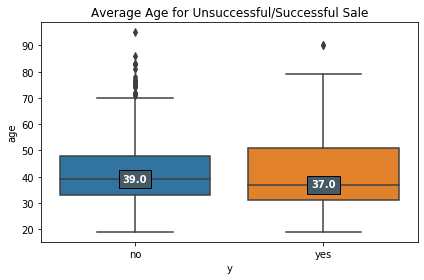

In [27]:
boxplot_age = sns.boxplot(x = 'y', y = 'age', data = df).set_title('Average Age for Unsuccessful/Successful Sale') 

ax = boxplot_age.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

boxplot_age.figure.tight_layout()

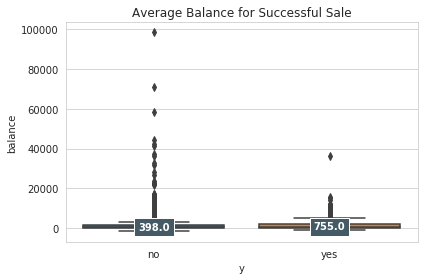

In [0]:
boxplot_balance = sns.boxplot(x = 'y', y = 'balance', data = df).set_title('Average Balance for Successful Sale') 

ax = boxplot_balance.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

boxplot_balance.figure.tight_layout()

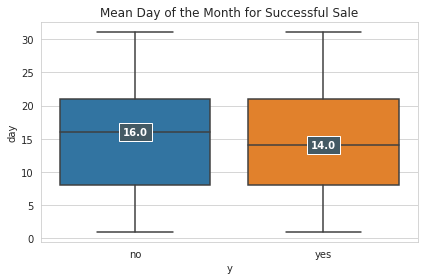

In [0]:
boxplot_day = sns.boxplot(x = 'y', y = 'day', data = df).set_title('Mean Day of the Month for Successful Sale') 

ax = boxplot_day.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

boxplot_day.figure.tight_layout()

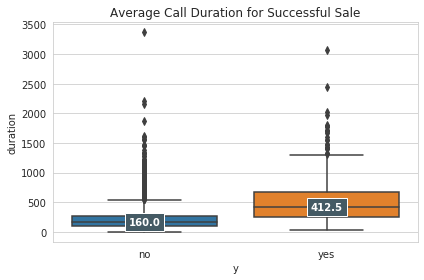

In [0]:
boxplot_duration = sns.boxplot(x = 'y', y = 'duration', data = df).set_title('Average Call Duration for Successful Sale') 

ax = boxplot_duration.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

boxplot_duration.figure.tight_layout()

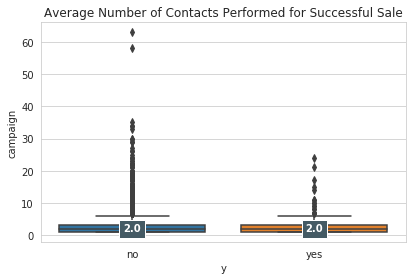

In [0]:
boxplot_campaign = sns.boxplot(x = 'y', y = 'campaign', data = df).set_title('Average Number of Contacts Performed for Successful Sale') 

ax = boxplot_campaign.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

boxplot_campaign.figure.tight_layout()

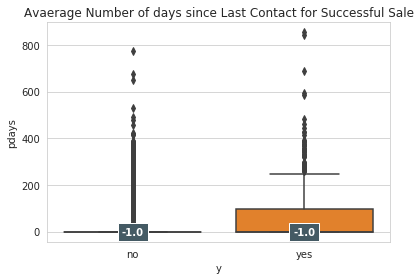

In [0]:
boxplot_pdays = sns.boxplot(x = 'y', y = 'pdays', data = df).set_title('Avaerage Number of days since Last Contact for Successful Sale') 

ax = boxplot_pdays.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

boxplot_pdays.figure.tight_layout()

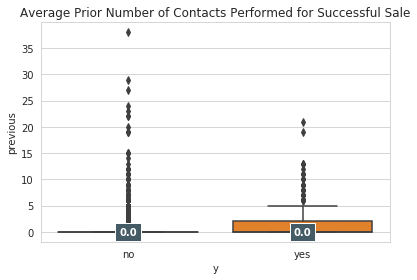

In [0]:
boxplot_previous = sns.boxplot(x = 'y', y = 'previous', data = df).set_title('Average Prior Number of Contacts Performed for Successful Sale') 

ax = boxplot_previous.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

boxplot_previous.figure.tight_layout()

In [0]:
df['pdays'].value_counts()

-1      4054
 182      22
 91       19
 92       17
 183      14
        ... 
 66        1
 62        1
 22        1
 14        1
 8         1
Name: pdays, Length: 309, dtype: int64

In [0]:
pdays_s = df.groupby(["y", "pdays"]).size()
pdays_df = pd.DataFrame(pdays_s).reset_index()
pdays_df.columns = ['y','pdays', 'count']
pdays_df

,y,pdays,count
0,no,-1,3680
1,no,2,3
2,no,3,1
3,no,8,1
4,no,9,1
...,...,...,...
394,yes,587,1
395,yes,595,1
396,yes,690,1
397,yes,842,1


In [0]:
pdays_df_agg = pdays_df.groupby(['y','pdays']).agg({'count':sum})
g = pdays_df_agg['count'].groupby(level=0, group_keys=False)
g.nlargest(3)

y    pdays
no   -1       3680
      175       11
      182       11
yes  -1        374
      91        11
      182       11
Name: count, dtype: int64

In [0]:
df_post_wo_pdays = df_post.copy()

In [0]:
df_post_wo_pdays = df_post_wo_pdays.drop(['pdays'], axis = 1)

KeyError: ignored

In [0]:
df_post_wo_pdays.to_csv('df_post_wo_pdays.csv')

In [0]:
files.download('df_post_wo_pdays.csv')

In [0]:
df_post1 = (df_post[df_post['pdays'] == -1]).copy()

In [0]:
df_post1 = df_post1.drop(['pdays'], axis = 1)

In [0]:
df_post1.to_csv('df_post1.csv')

In [0]:
files.download('df_post1.csv')

In [0]:
df_post2 = (df_post[df_post['pdays'] != -1]).copy()

In [0]:
df_post2.to_csv('df_post2.csv')

In [0]:
files.download('df_post2.csv')

In [0]:
print(get_top_abs_correlations(df_post2, 10))

poutcome  y            0.490017
age       marital      0.431564
job       education    0.419816
housing   poutcome     0.352542
          pdays        0.336671
          y            0.320146
job       housing      0.298019
pdays     poutcome     0.265083
age       job          0.218228
job       y            0.202210
dtype: float64


In [0]:
df_post3 = df_post2.drop(['pdays'], axis = 1)

In [0]:
df_post3.to_csv('df_post3.csv')

In [0]:
files.download('df_post3.csv')

In [0]:
print(get_top_abs_correlations(df_post1, 10))

job        education    0.420667
age        marital      0.407966
housing    contact      0.243716
job        housing      0.225351
age        job          0.184098
day        campaign     0.183373
age        housing      0.167853
job        contact      0.160583
education  contact      0.154505
contact    y            0.134046
dtype: float64


In [0]:
print(get_top_abs_correlations(df_post_wo_pdays, 10))

job       education    0.421423
age       marital      0.412446
previous  poutcome     0.385763
poutcome  y            0.317107
job       housing      0.234074
age       job          0.190604
contact   previous     0.185143
          poutcome     0.182654
housing   contact      0.179725
day       campaign     0.165532
dtype: float64


In [0]:
df_post_campaign_analysis = (df_post[df_post['campaign'] == 2]).copy()

In [0]:
df_post_campaign_analysis

,age,job,marital,education,default,balance,housing,loan,contact,day,campaign,pdays,previous,poutcome,y
3,48,0.091613,0.102697,0.105264,0.118368,1355,0.157527,0.126917,0.148640,4,2,-1,0,0.093973,0
5,32,0.141240,0.144723,0.149109,0.118368,4,0.082946,0.126917,0.053819,9,2,-1,0,0.093973,0
11,54,0.172628,0.118959,0.149109,0.118368,3076,0.157527,0.126917,0.148640,27,2,-1,0,0.093973,1
14,50,0.141240,0.118959,0.149109,0.118368,30,0.157527,0.126917,0.148640,20,2,-1,0,0.093973,0
29,67,0.172628,0.102697,0.112932,0.118368,696,0.157527,0.126917,0.113563,4,2,-1,0,0.093973,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,45,0.091613,0.118959,0.105264,0.118368,-179,0.157527,0.126917,0.053819,3,2,-1,0,0.093973,0
4984,41,0.080859,0.102697,0.105264,0.118368,49,0.082946,0.126917,0.148640,15,2,-1,0,0.093973,0
4985,34,0.141240,0.144723,0.149109,0.118368,318,0.082946,0.126917,0.053819,5,2,-1,0,0.093973,0
4988,33,0.141240,0.144723,0.149109,0.118368,321,0.157527,0.126917,0.148640,22,2,-1,0,0.093973,0
